In [2]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
import math
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.svm import SVR
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Dữ-liệu-Lịch-sử-AGR.csv',delimiter=";")
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-02,"6062,9","5964,5","6200,7","5964,5",930.28K,1.65%
2018-01-03,"5885,7","6102,2","6161,3","5757,8",889.20K,-2.92%
2018-01-04,"5895,6",5807,6053,"5797,1",1.08M,0.17%
2018-01-05,5807,"6072,7","6072,7",5807,943.35K,-1.50%
2018-01-08,"5698,7","5905,4","5915,2","5659,3",790.88K,-1.86%
...,...,...,...,...,...,...
2023-12-11,16050,16150,16150,15750,1.52M,0.00%
2023-12-12,15950,16050,16250,15950,706.20K,-0.62%
2023-12-13,15800,16000,16300,15700,1.54M,-0.94%


In [4]:
def custom_float_conversion(value):
    try:
        # Replace commas with dots and convert to float
        cleaned_value = float(value.replace(',', '.'))
        return cleaned_value
    except (ValueError, AttributeError):
        return np.nan

In [5]:
df['Price']=df['Price'].apply(custom_float_conversion)

In [6]:
count = df['Price'].count()
minimum = df['Price'].min()
maximum = df['Price'].max()
q1 = df['Price'].quantile(0.25)
median = df['Price'].median()
q3 = df['Price'].quantile(0.75)
mean_value = df['Price'].mean() 

print(f"Count: \t\t{count}")
print(f"Minimum: \t{minimum}")
print(f"Maximum: \t{maximum}")
print(f"Mean: \t\t{mean_value}")
print(f"Q1: \t\t{q1}")
print(f"Median (Q2): \t{median}")
print(f"Q3: \t\t{q3}")

Count: 		1488
Minimum: 	2165.3
Maximum: 	27263.3
Mean: 		8814.045497311829
Q1: 		3671.2
Median (Q2): 	6860.1
Q3: 		12700.0


In [7]:
std_dev = df['Price'].std()
sem = df['Price'].sem()
sample_var = df['Price'].var()
kurt = kurtosis(df['Price'])
skewness = skew(df['Price'])
data_sum = df['Price'].sum()
mode_value = df['Price'].mode().values[0]

print(f"Standard Error: \t{sem}")
print(f"Standard Deviation: \t{std_dev}")
print(f"Sample Variance: \t{sample_var}")
print(f"Kurtosis: \t\t{kurt}")
print(f"Skewness: \t\t{skewness}")
print(f"Sum: \t\t\t{data_sum}")
print(f"Mode: \t\t\t{mode_value}")

Standard Error: 	151.29730882149602
Standard Deviation: 	5836.233629410425
Sample Variance: 	34061622.97706119
Kurtosis: 		-0.17749953867009038
Skewness: 		0.8756220880007658
Sum: 			13115299.700000001
Mode: 			3346.4


<Axes: xlabel='Date'>

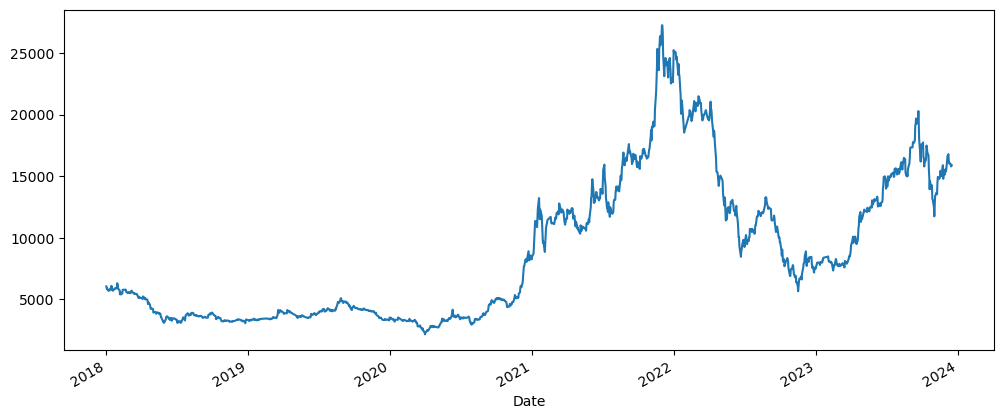

In [8]:
df['Price'].plot(figsize=(12,5))

Text(0.5, 1.0, 'AGR open price')

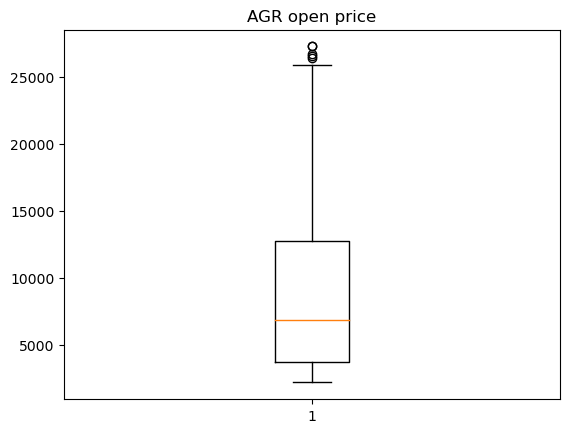

In [18]:
plt.boxplot(df['Price'])
plt.title('AGR open price')

Text(0, 0.5, 'Frequency')

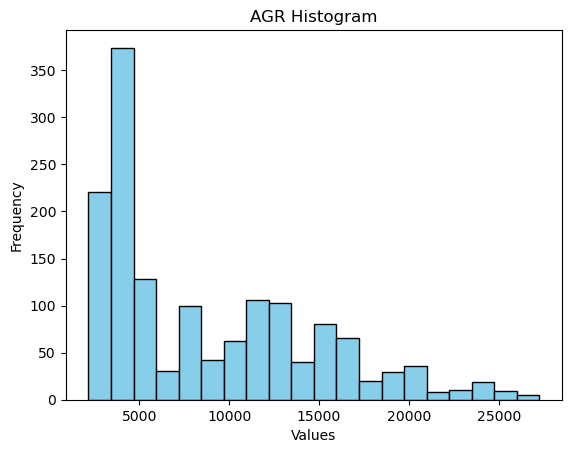

In [17]:
plt.hist(df.Price, bins=20, color='skyblue', edgecolor='black')
plt.title('AGR Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')